In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
#what is the current working directory?
import os
os.getcwd()

'C:\\Users\\maden\\Documents\\DataProjects\\WiDS2020\\HiddenFigures\\02_code'

In [3]:
#Dependencies
import numpy as np
import pandas as pd
import re

from datetime import date, datetime

#set df scrolling
pd.set_option("display.max.columns",None)
#set df precision to 2 decimals for now...
pd.set_option("display.precision",2)
pd.set_option('display.max_rows',500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = OneHotEncoder(handle_unknown = 'ignore')
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Load Test / Train Data

In [4]:
#Import Train Data
dfpath_train = "../01_data/training_v2.csv"
dfpath_test = "../01_data/unlabeled.csv"

df_train = pd.read_csv(dfpath_train)
print(df_train.shape)

df_test = pd.read_csv(dfpath_test)
print(df_test.shape)

target_col = 'hospital_death'

(91713, 186)
(39308, 186)


# Data Cleaning 

In [5]:
df_train.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.54,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.93,0,70.2,NaN,108.0,203

In [6]:
df_test.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.1,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.10,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.13,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.5,1,Caucasian,F,145.0,Operating Room,Operating Room / Recovery,

In [7]:
# Clean up categorical colums & export Tableau for some exploration
#1.  change to all lowercase
df_train = df_train.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
df_train.head(2)

df_test = df_test.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)
df_test.head(2)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.1,0,caucasian,m,180.3,emergency department,accident & emergency,1105,admit,neuro icu,0.10,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.13,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neurological,neurologic
1,5,130737,178,NaN,NaN,19.5,1,caucasian,f,145.0,operating room,operating room / recovery,

In [8]:
df_train.to_csv("../01_data/training_cleaned.csv", index=False)
df_test.to_csv("../01_data/test_cleaned.csv", index=False)

# Preprocessing

In [9]:
#process numeric columns
df_train_numeric = df_train._get_numeric_data()
#df_train_numeric.head()
df_train_numeric.shape

(91713, 178)

In [10]:
#process numeric columns
df_test_numeric = df_test._get_numeric_data()
# df_test_numeric.head()
df_test_numeric.shape

(39308, 178)

In [11]:
df_train_cat = df_train.drop(df_train_numeric, axis = 1)
# df_train_cat.head()
df_train_cat.shape

(91713, 8)

In [12]:
df_test_cat = df_test.drop(df_test_numeric, axis = 1)
# df_test_cat.head()
df_test_cat.shape

(39308, 8)

In [13]:
# Not using the categorical columns
df_train_new = df_train.drop(df_train_cat, axis = 1)
df_train_new.shape

(91713, 178)

In [14]:
# Not using the categorical columns
df_test_new = df_test.drop(df_test_cat, axis = 1)
df_test_new.shape

(39308, 178)

# Prepare for Machine Learning

In [15]:
#which columns have > 50% of their columns as NA?

# #Example 1: Remove Missing Values 
#drop columns with > 50% of rows with missing values  - How does this impact our dataset?
threshold = int(len(df_train_new) * .5)
print(threshold)
df_train_new = df_train_new.dropna(thresh = threshold, axis = 1)
df_train_new.head()


print(df_train_new.shape)

45856
(91713, 104)


In [16]:
#Column names being fed to model minus the prediction columns and those that are not as relevant
train_features = list(df_train_new.drop(['hospital_death', 'encounter_id','patient_id'], axis = 1).columns.values)
train_features = list(df_train_new.drop([ 'encounter_id','patient_id'], axis = 1).columns.values)

# Based on model importances, leave out all of the apache bodysystem values?
# and the other categorical feature too.  The model got worse when they were added in. 

train_features = list(df_train_new.drop(['encounter_id','patient_id'
                                        ], axis = 1).columns.values)

train_features = list(df_train_new.drop(['encounter_id','patient_id'], axis = 1).columns.values)

print(train_features)

['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvas

In [17]:
# #drop all columns except Apache 4a Hospital Prediction
# train_features = list(df_train_new.drop(['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height',\
#                                          'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache',\
#                                          'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', \
#                                          'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', \
#                                          'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',\
#                                          'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',\
#                                          'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', \
#                                          'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache',\
#                                          'urineoutput_apache', 'ventilated_apache', 'wbc_apache', \
#                                          'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max',\
#                                          'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',\
#                                          'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', \
#                                          'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',\
#                                          'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max',\
#                                          'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max',\
#                                          'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',\
#                                          'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min',\
#                                          'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', \
#                                          'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', \
#                                          'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', \
#                                          'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', \
#                                          'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max',\
#                                          'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', \
#                                          'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',\
#                                          'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',\
#                                          'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', \
#                                          'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min',\
#                                          'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', \
#                                          'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max',\
#                                          'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',\
#                                          'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max',\
#                                          'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',\
#                                          'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', \
#                                          'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', \
#                                          'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', \
#                                          'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', \
#                                          'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min',\
#                                          'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', \
#                                          'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', \
#                                          'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min',\
#                                          'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max',\
#                                          'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min',\
#                                          'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max',\
#                                          'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', \
#                                          'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', \
#                                          'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',\
#                                          'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', \
#                                          'solid_tumor_with_metastasis'], axis = 1).columns.values)

# print(train_features)


In [18]:
# non_apache_attributes = [i for i in df_train_new if 'apache' in i]
# print(non_apache_attributes)

In [19]:
# #drop all apache columns except Apache 4a Hospital Prediction, 'apache_4a_icu_death_prob','age'
# train_features = list(df_train_new.drop(['apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', \
#                                          'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache',\
#                                          'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', \
#                                          'glucose_apache', 'heart_rate_apache', 'hematocrit_apache',\
#                                          'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', \
#                                          'temp_apache', 'ventilated_apache', 'wbc_apache',], axis = 1).columns.values)

# print(train_features)


In [20]:
#Pop out the columns that are only identifiers  ie. encounter and patient id 
# These can be merged back into the result later
identifiers_train = df_train_new[['encounter_id','patient_id']]
identifiers_train.head()

,encounter_id,patient_id
0,66154,25312
1,114252,59342
2,119783,50777
3,79267,46918
4,92056,34377


In [21]:
identifiers_test = df_test_new[['encounter_id','patient_id']]
identifiers_test.head()

,encounter_id,patient_id
0,2,127112
1,5,130737
2,7,101458
3,8,48067
4,10,25865


In [22]:
#Select Specific Features
#df_train_new = df_train_new.drop(['encounter_id','patient_id'], axis = 1)
#using features list above
df_train_new = df_train_new[train_features]
df_train_new.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,118,0,68.0,22.73,0,180.3,92,5.42e-01,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,81,0,77.0,27.42,0,160.0,90,9.28e-01,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,118,0,25.0,31.95,0,172.7,93,6.94e-04,0,95.3,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,118,0,81.0,22.64,1,165.1,92,6.94e-04,0,61.7,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,1.0,8.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,185.0,88.0,NaN,NaN,11.6,8.9,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,0,19.0,NaN,0,188.0,91,7.36e-02,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,16.0,NaN,36.7,0.0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

In [23]:
#df_test_new = df_test_new.drop(['encounter_id','patient_id'], axis = 1)
#use the same features columns for the test dataset
df_test_new = df_test_new[train_features]
df_test_new.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,7,NaN,56.0,21.10,0,180.3,1105,1.04e-01,0,68.6,301.0,405.01,0,0.0,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,0.0,4.7,74.0,51.0,74.0,51.0,100.0,78.0,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178,NaN,NaN,19.50,1,145.0,1043,2.31e-01,0,41.0,217.0,1502.02,1,0.0,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,37.0,NaN,37.0,0.0,NaN,65.0,31.0,65.0,31.0,73.0,60.0,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86,NaN,66.0,32.52,1,170.2,1035,1.41e-01,0,94.2,302.0,1208.06,1,0.0,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,0.0,14.8,85.0,57.0,NaN,NaN,117.0,86.0,110.0,71.0,NaN,NaN,28.0,10.0,100.0,95.0,172.0,102.0,NaN,NaN,37.5,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,163,NaN,64.0,20.80,0,182.8,1078,2.08e-03,0,69.5,303.0,211.03,0,0.0,24.0,0.75,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,30.0,133.0,37.7,1.0,9.7,63.0,42.0,63.0,42.0,111.0,60.0,76.0,48.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,115.0,69.0,38.4,37.5,62.0,57.0,62.0,57.0,111.0,102.0,76.0,65.0,76.0,65.0,26.0,23.0,95.0,93.0,115.0,92.0,115.0,92.0,38.0,38.0,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.0,20.0,11.0,9.1,32.0,27.0,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,59,NaN,56.0,NaN,0,NaN,1012,4.86e-03,0,66.4,217.0,1501.01,1,0.0,11.0,0.52,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,5.0,134.0,36.1,1.0,14.5,100.0,24.0,100.0,24.0,94.0,62.0,137.0,37.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,222.0,66.0,37.9,36.0,81.0,66.0,81.0,66.0,82.0,76.0,137.0,113.0,137.0,113.0,16.0,16.0,100.0,99.0,222.0,194.0,222.0,195.0,36.0,36.0,11.0,9.0,8.2,7.7,0.67,0.52,192.0,141.0,NaN,NaN,12.3,11.1,36.5,32.8,22

# Test / Train Split

In [24]:
#useful function:  df._get_numeric_data() will return only numeric columns from a pd dataframe - good for ML models

In [25]:
X = df_train_new.drop([target_col], axis = 1)  #drop off the column to predict
y = df_train_new[target_col].values.reshape(-1,1)

#Prep data for prediction
df_test = df_test_new.drop([target_col], axis = 1)  #drop off the column to predict
#df_test = df_test_new
df_test.head()
print(df_test.shape)

(39308, 101)


In [26]:
X.head(2)

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,118,68.0,22.73,0,180.3,92,0.54,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,81,77.0,27.42,0,160.0,90,0.93,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:

print(X.shape, y.shape)

(91713, 101) (91713, 1)


In [28]:
X.isna().sum()

hospital_id                          0
age                               4228
bmi                               3429
elective_surgery                     0
height                            1334
icu_id                               0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bun_apache                       19262
creatinine_apache                18853
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
glucose_apache                   11036
heart_rate_apache                  878
hematocrit_apache                19878
intubated_apache                   715
map_apache                         994
resprate_apache                   1234
sodium_apache            

In [29]:
#Handle the NaN values in the rows  (remove, impute, or find algorithm that allows them)

# Example 2:  Imputing  (mean,median,mode, randomly selected, value estimated from another model (liek nearest neighbors))
#Use the imputer function to replace the NaN values
#I liked this for help... https://www.kaggle.com/learn-forum/62035
##SIMPLE IMPUTER
#imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer = SimpleImputer(missing_values = np.nan, strategy = "constant")

#Impute using other columns ie. Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# imputer = IterativeImputer(max_iter = 2, random_state=0)

#Fit the data, function learns the stats
X_imputed = pd.DataFrame(imputer.fit_transform(X))
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test))
#add titles back
X_imputed.columns = X.columns
df_test_imputed.columns = df_test.columns

X = X_imputed
X.head()

df_test = df_test_imputed
df_test.head()

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,7.0,56.0,21.10,0.0,180.3,1105.0,1.04e-01,0.0,68.6,301.0,405.01,0.0,0.0,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,0.0,4.7,74.0,51.0,74.0,51.0,100.0,78.0,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178.0,0.0,19.50,1.0,145.0,1043.0,2.31e-01,0.0,41.0,217.0,1502.02,1.0,0.0,0.0,0.00,4.0,6.0,0.0,4.0,0.0,60.0,0.0,0.0,53.0,37.0,0.0,37.0,0.0,0.0,65.0,31.0,65.0,31.0,73.0,60.0,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86.0,66.0,32.52,1.0,170.2,1035.0,1.41e-01,0.0,94.2,302.0,1208.06,1.0,0.0,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,0.0,14.8,85.0,57.0,0.0,0.0,117.0,86.0,110.0,71.0,0.0,0.0,28.0,10.0,100.0,95.0,172.0,102.0,0.0,0.0,37.5,35.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,163.0,64.0,20.80,0.0,182.8,1078.0,2.08e-03,0.0,69.5,303.0,211.03,0.0,0.0,24.0,0.75,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,30.0,133.0,37.7,1.0,9.7,63.0,42.0,63.0,42.0,111.0,60.0,76.0,48.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,115.0,69.0,38.4,37.5,62.0,57.0,62.0,57.0,111.0,102.0,76.0,65.0,76.0,65.0,26.0,23.0,95.0,93.0,115.0,92.0,115.0,92.0,38.0,38.0,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.0,20.0,11.0,9.1,32.0,27.0,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,59.0,56.0,0.00,0.0,0.0,1012.0,4.86e-03,0.0,66.4,217.0,1501.01,1.0,0.0,11.0,0.52,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,5.0,134.0,36.1,1.0,14.5,100.0,24.0,100.0,24.0,94.0,62.0,137.0,37.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,222.0,66.0,37.9,36.0,81.0,66.0,81.0,66.0,82.0,76.0,137.0,113.0,137.0,113.0,16.0,16.0,100.0,99.0,222.0,194.0,222.0,195.0,36.0,36.0,11.0,9.0,8.2,7.7,0.67,0.52,192.0,141.0,0.0,0.0,12.3,

In [30]:
print(X.shape)

(91713, 101)


In [31]:

# #How many NA records are in each column?
X.isna().sum()

hospital_id                      0
age                              0
bmi                              0
elective_surgery                 0
height                           0
icu_id                           0
pre_icu_los_days                 0
readmission_status               0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache                    0
temp_apache                      0
ventilated_apache                0
wbc_apache          

In [32]:
# #Normalize the data
# #StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. 
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X)
# y_scaler = StandardScaler().fit(y)
# df_test_scaler = StandardScaler().fit(df_test)
# X_scaled = X_scaler.transform(X)
# y_scaled = y_scaler.transform(y)
# df_test_scaled = df_test_scaler.transform(df_test)


In [33]:
# df_test_scaled.shape

In [34]:
df_test.shape

(39308, 101)

In [35]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

In [37]:
#Fix Data Type
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[0 0 0 ... 0 0 0]
binary
binary
binary


C:\Users\maden\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression

In [39]:

# Fit regression model
# lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, \
#                             class_weight=None, random_state=42, solver='lbfgs', max_iter=1000, multi_class='auto', \
#                             verbose=0, warm_start=False, n_jobs=None)

lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, \
                            class_weight= 'balanced', random_state=42, solver='liblinear', max_iter=1000, multi_class='auto', \
                            verbose=0, warm_start=False, n_jobs=None)
model = lr
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

training_score = model.score(X_train, y_train_encoded)
testing_score = model.score(X_test, y_test_encoded)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.802861130495464
Testing Score: 0.7999040516376641


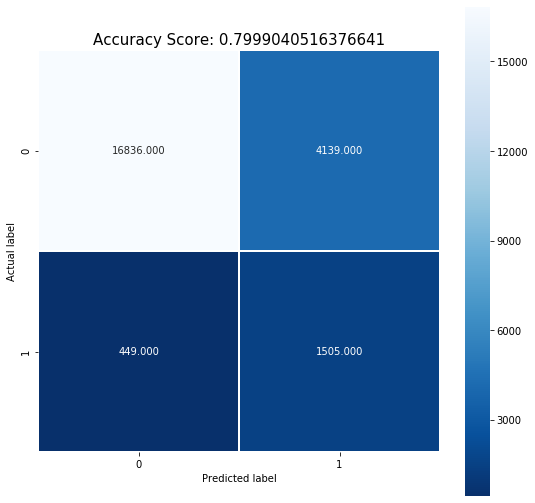

In [40]:
#Confusion Matrix (Seaborn)
#This is where we look at False positive, False negative etc. 

conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


#this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
plt.title(all_sample_title, size = 15);

In [41]:
#now, lets train on the entire training set... 

In [42]:
#Fix Data Type for y
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[0 0 0 ... 0 0 0]
binary
binary
binary


C:\Users\maden\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# Fit regression model
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, \
                            class_weight=None, random_state=42, solver='lbfgs', max_iter=2000, multi_class='auto', \
                            verbose=0, warm_start=False, n_jobs=None)
model = lr
model.fit(X, y_train_encoded)
training_score = model.score(X, y_train_encoded)
print(f"Training Score: {training_score}")

Training Score: 0.9241110856694252


C:\Users\maden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
# #Grid search to select models and parameters for the model
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# #Love this:  https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

# # Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , LogisticRegression())])

# # Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     'classifier__max_features' : list(range(6,32,5))}
# ]

# # Create grid search object

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# # Fit on data

# best_clf = clf.fit(X_train, y_train_encoded)
# predictions =clf.predict(X_test)

# training_score = clf.score(X_train, y_train_encoded)
# testing_score = clf.score(X_test, y_test_encoded)

# print(clf.best_params_)

# print(clf.best_score_)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

# #Confusion Matrix (Seaborn)
# #This is where we look at False positive, False negative etc. 

# conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


# #this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# plt.figure(figsize=(9,9))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
# plt.title(all_sample_title, size = 15);

In [ ]:
#Need to use the best model... 

# Random Forest Classifier

In [ ]:
# Fit regression model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=130, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None)
model = rf
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

training_score = model.score(X_train, y_train_encoded)
testing_score = model.score(X_test, y_test_encoded)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
print(model.feature_importances_)

In [ ]:
# for feature, importance in dict(zip(train_features,model.feature_importances_)):
#     print(feature)

importances = dict(zip(train_features,model.feature_importances_))
for f, i in sorted(importances.items(), key = lambda item: item[1], reverse = True):
    print(f, i)

# best_features = []
# for f, i in sorted(importances.items(), key = lambda item: item[1], reverse = True):
#     if i > .009:
#         best_features.append(f)
        
# print(best_features)
        


In [ ]:
#Confusion Matrix (Seaborn)
#This is where we look at False positive, False negative etc. 

conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


#this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
plt.title(all_sample_title, size = 15);

In [44]:
#Now we need to be able to get the prediction into the format needed for submittal
#add feature importances in here too, so that we can improve! 

In [45]:
print(target_col)

hospital_death


In [46]:
df_test.head()

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,7.0,56.0,21.10,0.0,180.3,1105.0,1.04e-01,0.0,68.6,301.0,405.01,0.0,0.0,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,0.0,4.7,74.0,51.0,74.0,51.0,100.0,78.0,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178.0,0.0,19.50,1.0,145.0,1043.0,2.31e-01,0.0,41.0,217.0,1502.02,1.0,0.0,0.0,0.00,4.0,6.0,0.0,4.0,0.0,60.0,0.0,0.0,53.0,37.0,0.0,37.0,0.0,0.0,65.0,31.0,65.0,31.0,73.0,60.0,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86.0,66.0,32.52,1.0,170.2,1035.0,1.41e-01,0.0,94.2,302.0,1208.06,1.0,0.0,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,0.0,14.8,85.0,57.0,0.0,0.0,117.0,86.0,110.0,71.0,0.0,0.0,28.0,10.0,100.0,95.0,172.0,102.0,0.0,0.0,37.5,35.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,163.0,64.0,20.80,0.0,182.8,1078.0,2.08e-03,0.0,69.5,303.0,211.03,0.0,0.0,24.0,0.75,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,30.0,133.0,37.7,1.0,9.7,63.0,42.0,63.0,42.0,111.0,60.0,76.0,48.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,115.0,69.0,38.4,37.5,62.0,57.0,62.0,57.0,111.0,102.0,76.0,65.0,76.0,65.0,26.0,23.0,95.0,93.0,115.0,92.0,115.0,92.0,38.0,38.0,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.0,20.0,11.0,9.1,32.0,27.0,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,59.0,56.0,0.00,0.0,0.0,1012.0,4.86e-03,0.0,66.4,217.0,1501.01,1.0,0.0,11.0,0.52,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,5.0,134.0,36.1,1.0,14.5,100.0,24.0,100.0,24.0,94.0,62.0,137.0,37.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,222.0,66.0,37.9,36.0,81.0,66.0,81.0,66.0,82.0,76.0,137.0,113.0,137.0,113.0,16.0,16.0,100.0,99.0,222.0,194.0,222.0,195.0,36.0,36.0,11.0,9.0,8.2,7.7,0.67,0.52,192.0,141.0,0.0,0.0,12.3,

In [47]:
#Make new prediction on the df_test data
#df_test[target_col] = model.predict(df_test_scaled)
df_test[target_col] = model.predict(df_test)
# df_test[target_col] = model.predict_proba(df_test_scaled)[:,1]
#df_test[target_col] = clf.predict_proba(df_test_scaled)[:,1]

In [48]:
df_test.head()

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,7.0,56.0,21.10,0.0,180.3,1105.0,1.04e-01,0.0,68.6,301.0,405.01,0.0,0.0,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,0.0,4.7,74.0,51.0,74.0,51.0,100.0,78.0,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,178.0,0.0,19.50,1.0,145.0,1043.0,2.31e-01,0.0,41.0,217.0,1502.02,1.0,0.0,0.0,0.00,4.0,6.0,0.0,4.0,0.0,60.0,0.0,0.0,53.0,37.0,0.0,37.0,0.0,0.0,65.0,31.0,65.0,31.0,73.0,60.0,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,86.0,66.0,32.52,1.0,170.2,1035.0,1.41e-01,0.0,94.2,302.0,1208.06,1.0,0.0,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,0.0,14.8,85.0,57.0,0.0,0.0,117.0,86.0,110.0,71.0,0.0,0.0,28.0,10.0,100.0,95.0,172.0,102.0,0.0,0.0,37.5,35.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,163.0,64.0,20.80,0.0,182.8,1078.0,2.08e-03,0.0,69.5,303.0,211.03,0.0,0.0,24.0,0.75,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,30.0,133.0,37.7,1.0,9.7,63.0,42.0,63.0,42.0,111.0,60.0,76.0,48.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,115.0,69.0,38.4,37.5,62.0,57.0,62.0,57.0,111.0,102.0,76.0,65.0,76.0,65.0,26.0,23.0,95.0,93.0,115.0,92.0,115.0,92.0,38.0,38.0,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.0,20.0,11.0,9.1,32.0,27.0,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,59.0,56.0,0.00,0.0,0.0,1012.0,4.86e-03,0.0,66.4,217.0,1501.01,1.0,0.0,11.0,0.52,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,5.0,134.0,36.1,1.0,14.5,100.0,24.0,100.0,24.0,94.0,62.0,137.0,37.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,222.0,66.0,37.9,36.0,81.0,66.0,81.0,66.0,82.0,76.0,137.0,113.0,137.0,113.0,16.0,16.0,100.0,99.0,222.0,194.0,222.0,195.0,36.0,36.0,11.0,9.0,8.2,7.7,0.67,0.52,19

In [49]:
#add the identifier "encounter_id" back in

df_test['encounter_id'] = identifiers_test['encounter_id']

In [50]:
df_test.head()

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death,encounter_id
0,7.0,56.0,21.10,0.0,180.3,1105.0,1.04e-01,0.0,68.6,301.0,405.01,0.0,0.0,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,0.0,4.7,74.0,51.0,74.0,51.0,100.0,78.0,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
1,178.0,0.0,19.50,1.0,145.0,1043.0,2.31e-01,0.0,41.0,217.0,1502.02,1.0,0.0,0.0,0.00,4.0,6.0,0.0,4.0,0.0,60.0,0.0,0.0,53.0,37.0,0.0,37.0,0.0,0.0,65.0,31.0,65.0,31.0,73.0,60.0,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
2,86.0,66.0,32.52,1.0,170.2,1035.0,1.41e-01,0.0,94.2,302.0,1208.06,1.0,0.0,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,0.0,14.8,85.0,57.0,0.0,0.0,117.0,86.0,110.0,71.0,0.0,0.0,28.0,10.0,100.0,95.0,172.0,102.0,0.0,0.0,37.5,35.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7
3,163.0,64.0,20.80,0.0,182.8,1078.0,2.08e-03,0.0,69.5,303.0,211.03,0.0,0.0,24.0,0.75,4.0,6.0,0.0,1.0,122.0,111.0,32.0,1.0,48.0,30.0,133.0,37.7,1.0,9.7,63.0,42.0,63.0,42.0,111.0,60.0,76.0,48.0,76.0,48.0,35.0,15.0,100.0,92.0,115.0,69.0,115.0,69.0,38.4,37.5,62.0,57.0,62.0,57.0,111.0,102.0,76.0,65.0,76.0,65.0,26.0,23.0,95.0,93.0,115.0,92.0,115.0,92.0,38.0,38.0,24.0,24.0,7.9,7.4,0.75,0.72,148.0,122.0,22.0,20.0,11.0,9.1,32.0,27.0,248.0,209.0,4.1,4.0,138.0,133.0,9.7,7.1,0.19,0.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,8
4,59.0,56.0,0.00,0.0,0.0,1012.0,4.86e-03,0.0,66.4,217.0,1501.01,1.0,0.0,11.0,0.52,1.0,4.0,0.0,1.0,192.0,94.0,32.8,0.0,41.0,5.0,134.0,36.1,1.0,14.5,100.0,24.0,100.0,24.0,94.0,62.0,137.0,37.0,137.0,37.0,21.0,0.0,100.0,95.0,222.0,66.0,222.0,66.0,37.9,36.0,81.0,66.0,81.0,66.0,82.0,76.0,137.0,113.0,137.0,113.0,16.0,16.0,100.0,99.0,222.0,194.0,222.0,195.0,36.0,36.0,11.0,9.0

In [51]:
#Convert encounter_id to int32
df_test['encounter_id'] = pd.to_numeric(df_test['encounter_id'],downcast = 'integer')

In [52]:
output = df_test[['encounter_id','hospital_death']]
output.head()

,encounter_id,hospital_death
0,2,0
1,5,0
2,7,0
3,8,0
4,10,0


In [53]:
df_test['encounter_id'].dtype

dtype('int32')

In [54]:
output.to_csv("../06_submissions/" + str(date.today()) + "_2" + ".csv", index=False)